In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import pandas as pd
%matplotlib inline

In [2]:
dataset = pd.read_csv("Social_Network_Ads.csv")

In [3]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
X = dataset.iloc[:,2:4].values
y = dataset.iloc[:,-1].values

In [5]:
X[0]

array([   19, 19000], dtype=int64)

In [6]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X = scale.fit_transform(X)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
X[0:10]

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283]])

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [10]:
clf = SVC(kernel='linear', random_state=0)
clf.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
y_pred = clf.predict(x_test)

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
accuracy_score(y_test, y_pred)

0.8666666666666667

In [14]:
from matplotlib._cm_listed import ListedColormap

In [15]:
x_set, y_set = x_train, y_train

# step inside range function
h = 0.01
X1, X2 = np.meshgrid(np.arange(x_set[:,0].min() - 1, x_set[:,0].max() + 1, h),
                    np.arange(x_set[:,1].min() - 1, x_set[:,1].max() + 1, h))

In [16]:
Z = clf.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape)

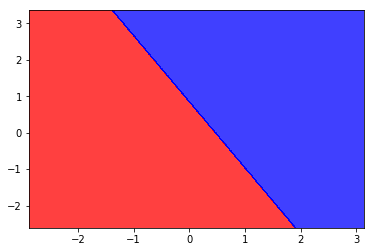

In [17]:
plt.contourf(X1,X2,Z, alpha=0.75, cmap = ListedColormap(('red','blue')))

In [18]:
clf.coef_

array([[ 1.49145208,  0.82222833]])

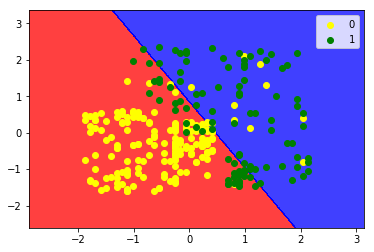

In [22]:
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

plt.contourf(X1,X2,Z, alpha=0.75, cmap = ListedColormap(('red','blue')))

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0], x_set[y_set == j, 1], 
               c = ListedColormap(('yellow','green'))(i), label=j)
plt.legend()